# 💻 Tutorial: Introduction to the Structured Use of Generative Language Models
> *An interactive guide to getting started with generative models with ready-to-use pipelines and APIs*

Sources and inspirations:  
- https://huggingface.co/tasks/text-generation
- https://www.geeksforgeeks.org/nlp/how-to-use-hugging-face-model-for-question-answering/

## 💬 What is Text Generation?

Text generation is a core capability of a class of models known as **language generation models**, which are a specific case of what’s commonly called **Generative Artificial Intelligence (GenAI)**. GenAI refers to artificial intelligence systems designed to create new content — including text, images, video, and audio — similar to the data they were trained on. These models don’t just replicate what they’ve seen, but rather they **learn underlying patterns** and structures in the data and use it to generate novel and coherent outputs.

In the case of language, **text generation models** (also known as *causal language models*) predict the next word in a sequence, one token at a time, based on the context. By repeating this prediction step, they can produce full sentences, paragraphs, or even entire documents that appear fluent and meaningful.  

Some of the most well-known, powerful, and widely used text generation models include the GPT family — short for Generative Pre-trained Transformers — along with the popular chatbot interface called ChatGPT. The latest version as of today is GPT-4, which is a proprietary model available through OpenAI’s paid API. If you want to use it for language generation in Python, you’ll need an OpenAI account and API key. Alternatively, several high-performing, instruction-tuned open-access models are freely available. These include Mixtral 8x7B, Cohere Command R+, and Meta Llama 3 70B, which can be used locally or via platforms like Hugging Face.

In this hands-on tutorial, we’ll explore how to use **pre-trained large language models (LLMs)** with Python tools like Hugging Face’s `transformers` library to perform different **text generation tasks**. You’ll learn how to prompt these models effectively and use them to complete, expand, or creatively transform text.

> 🧠 *Example*:  
> Input: `"Once upon a time in a land far away,"`  
> Output: `"there lived a young dragon who dreamed of flying across the ocean."`

Let’s get started!


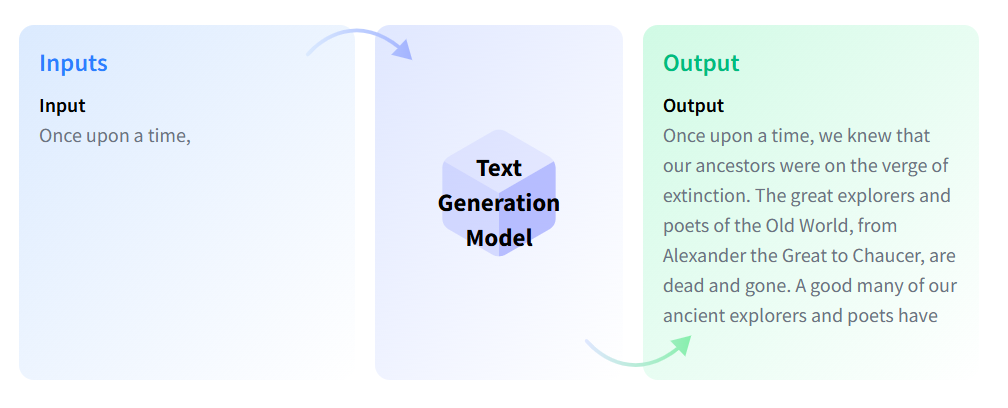

# Your first generator using the Hugging Face pipeline

## Text generation

In [ ]:
import transformers
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")
generator("Once upon a time", max_length=30, num_return_sequences=1)


Notice how the model stops when it hits ```max_length```, regardless of sentence completion. Depending on the model you're using, you can encourage more complete sentence endings in generated text using certain parameters—but you can't 100% guarantee that the model won't end mid-sentence unless you implement post-processing or use models with better stopping behavior.  

Here are a few leads you can explore:

In [ ]:
# Option 1: Increase max_length

generator("Once upon a time", max_length=60, num_return_sequences=1)

In [ ]:
# Option 2: Use eos_token_id to enforce stopping

generator("Once upon a time", max_length=60, num_return_sequences=2, eos_token_id=50256)

GPT-2 was trained without a true end-of-sentence token, but the <|endoftext|> token (eos_token_id=50256) acts as a stop token.
> If the model predicts the EOS token, it stops early, often at a sentence boundary. But it may not always do so.

In [ ]:
# Safe fix: Post-process to trim to last full sentence

import re

output = generator("Once upon a time", max_length=60)[0]['generated_text']
full_sentences = re.split(r'(?<=[.!?]) +', output)
print(" ".join(full_sentences[:-1]) if full_sentences else output)


In [ ]:
# Play with generation parameters

generator("The future of AI is",
          max_length=50,
          temperature=0.9,
          top_k=50,
          top_p=0.95,
          num_return_sequences=3)

Information about the adjustable parameters can be found here: https://huggingface.co/docs/transformers/main/en/main_classes/text_generation#transformers.GenerationConfig

## 🚀 Your Turn: Build Your Own Text Generator!

Using what you've learned so far, **write code to create a text generator** that completes *any phrase you choose*.  

### Requirements:
- The generated text should have a **maximum length of 40 tokens**.
- Try to ensure the output **ends at a complete sentence**.

✨ *Be creative with your prompt! For example:*  
> `"In a distant future, humanity will..."`  
> `"The secret recipe for happiness is..."`

---

🔎 *Once you’ve written your code, run the cell and see how your model finishes your phrase!*

In [ ]:
# YOUR CODE HERE

## Question answering

Generative language models can also be used to **answer questions**, making them especially useful in chatbot applications. A question, or **query**, can take multiple forms. In some cases, the model is provided with a **specific context** from which it extracts the answer. This is known as **contextual question answering**. In other cases, especially with more powerful models, no additional context is needed: the model draws on its internal knowledge to generate a plausible and relevant response.

 ### Contextual question answering

In [ ]:
question_answerer = pipeline("question-answering")

In [ ]:
question = "What is the capital of France?"
context = "France is a country in Western Europe. Its capital is Paris."
context_2 = "We are currently at CREST-IP Paris learning to use GenAI to answer questions in the Python interface."
context_3 = "Hello!"

Try the question answerer with different contexts and see how answers vary!

In [ ]:
answer = question_answerer(question=question, context=context_3)
print(answer['answer'])

In [ ]:
# 1. Using longer context
long_context = (
    "Python is a popular programming language known for its readability and versatility. "
    "It supports multiple programming paradigms including procedural, object-oriented, and functional programming. "
    "Python has a large ecosystem of libraries and frameworks for web development, data science, machine learning, and more. "
    "Its simplicity and strong community support make it an excellent choice for beginners and professionals alike."
)

question1 = "What programming paradigms does Python support?"

result1 = question_answerer(question=question1, context=long_context)
print(f"Answer 1: {result1['answer']}")

# 2. When the model struggles — reformulating questions
# Example: Original ambiguous question
question2a = "What is Python?"
result2a = question_answerer(question=question2a, context=long_context)
print(f"Answer 2a (ambiguous): {result2a['answer']}")

# Reformulated question to be more specific
question2b = "What kind of programming language is Python?"
result2b = question_answerer(question=question2b, context=long_context)
print(f"Answer 2b (reformulated): {result2b['answer']}")

# 3. Using a custom or fine-tuned model
# For illustration, switching to a larger model (e.g., 'bert-large-uncased-whole-word-masking-finetuned-squad')

qa_large = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")

result3 = qa_large(question=question1, context=long_context)
print(f"Answer 3 (larger model): {result3['answer']}")


### 📝 Hands-on exercise: try contextual question answering yourself

1. Pick a short paragraph — either one you write yourself or one provided below:

> *Example paragraph:*  
>  
> "Python is a popular programming language known for its readability and versatility. It supports multiple programming paradigms and has a large ecosystem of libraries."

2. Formulate **at least two questions** about the paragraph.

3. Use the `pipeline("question-answering")` from Hugging Face to get answers to your questions.

---

💡 *Tip:* Try changing the questions or the context to see how the model responds differently!


## Answering questions with no context

> https://huggingface.co/google/flan-t5-xl

In [ ]:
# Load an instruction-tuned model for QA
qa_pipeline = pipeline("text2text-generation", model="google/flan-t5-base")

# Ask a question directly, no additional context
question = "What is the capital of Japan?"
output = qa_pipeline(question, max_new_tokens=50)

print(output[0]['generated_text'])


### Your turn! 🎯

Experiment with non-contextual question answering using various open-source models. Try out different questions and compare how each model performs.

Share your observations and thoughts on which models handle specific types of questions better, or where they might struggle.


## Experimenting with the free trial of the OpenAI API

In [ ]:
# !pip install openai

In [ ]:
from openai import OpenAI

client = OpenAI(
  api_key="your_api_key"
)

completion = client.chat.completions.create(
  model="gpt-4o-mini",
  store=True,
  messages=[
    {"role": "user", "content": "write a haiku about ai"}
  ]
)

print(completion.choices[0].message);


In [ ]:
# response = client.responses.create(
#     model="gpt-3.5-turbo-0125",
#     input="Write a one-sentence bedtime story about a unicorn."
# )

# print(response.output_text)
